In [31]:
import pandas as pd
import seaborn as sns

In [32]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.figsize":(8, 8)}
sns.set_theme(context='notebook', style='darkgrid', palette='deep', rc= custom_params)
dark_blue = sns.color_palette("deep")[0]

In [2]:
df = pd.read_csv("raw_data/data.csv", sep="\t")

In [3]:
df["text"][0]

'From a gender perspective, Paulgaard points out that the labour markets of the fishing villages have been highly gender-segregated in terms of the existence of "male jobs" and "female jobs", however, the new business opportunities have led to the male population of the peripheral areas now working in the service industry in former "female jobs": "That boys and girls are doing the same jobs indicates change, because traditional boundaries between women and men\'s work are being crossed. But the fact that young people are still working represents continuity with the past" (Paulgaard 2002: 102). When Paulgaard refers to continuity with traditions, she refers to the expectations of young adults to participate in adult culture, thus these fishing villages traditionally have no actual youth culture. As described earlier, Paulgaard (2015) concludes that in some of Norway\'s peripheral areas school is still \'foreign\', a time waster stealing time from young adults who should instead spend th

In [4]:
!pip install nltk

In [8]:
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 



def cleaning(sentence):
    punctuation = string.punctuation
    wnl = WordNetLemmatizer()
    # Basic cleaning
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase 
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers
    
    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation
    
    tokenized_sentence = word_tokenize(sentence) ## tokenize 
    stop_words = set(stopwords.words('english')) ## define stopwords
    
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v") 
        for word in tokenized_sentence_cleaned]
    
    cleaned_sentence = ' '.join(word for word in lemmatized)
    
    return cleaned_sentence

In [9]:
df["cleaned_text"]= df["text"].apply(cleaning)

In [7]:
df["cleaned_text"][0],df["text"][0]

('gender perspective paulgaard point labour market fish villages highly gendersegregated term existence male job female job however new business opportunities lead male population peripheral areas work service industry former female job boys girls job indicate change traditional boundaries women mens work cross fact young people still work represent continuity past paulgaard paulgaard refer continuity traditions refer expectations young adults participate adult culture thus fish villages traditionally actual youth culture describe earlier paulgaard conclude norways peripheral areas school still foreign time waster steal time young adults instead spend time consider real work',
 'From a gender perspective, Paulgaard points out that the labour markets of the fishing villages have been highly gender-segregated in terms of the existence of "male jobs" and "female jobs", however, the new business opportunities have led to the male population of the peripheral areas now working in the servic

In [11]:
import matplotlib.pyplot as plt

In [16]:
df.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,cleaned_text
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,8,0.777778,gender perspective paulgaard point labour mark...
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333,labour legislation regulate maximum work hours...
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,8,0.777778,average figure also mask large differences acr...
3,10.1787/3726edff-en,0005d3e8b213d9e2cb967666e1aca2e9,Applied research is directed “primarily toward...,9,3,6,0.333333,apply research direct “ primarily towards spec...
4,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333,extent akin corruption difficult assess govern...


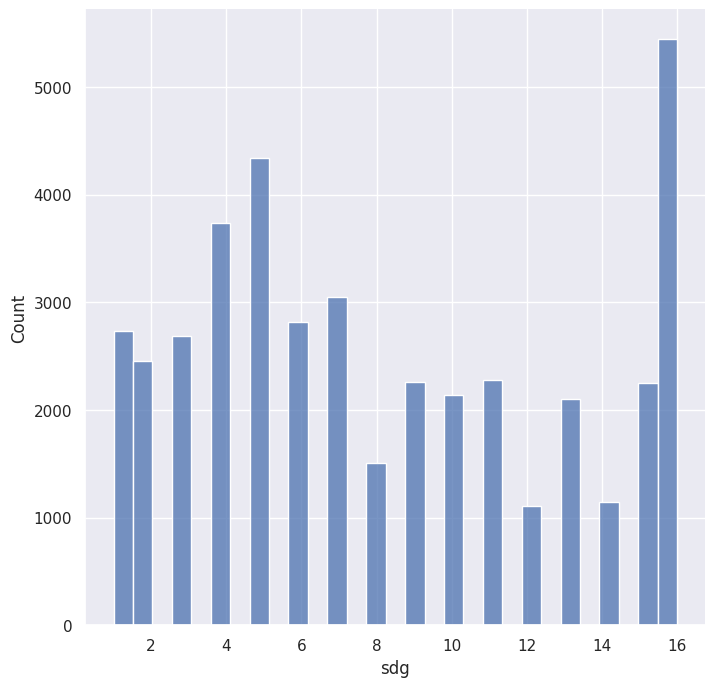

In [33]:
sns.histplot(df["sdg"],bins="auto");

In [37]:
vc =df["sdg"].value_counts()

<Axes: xlabel='count', ylabel='Count'>

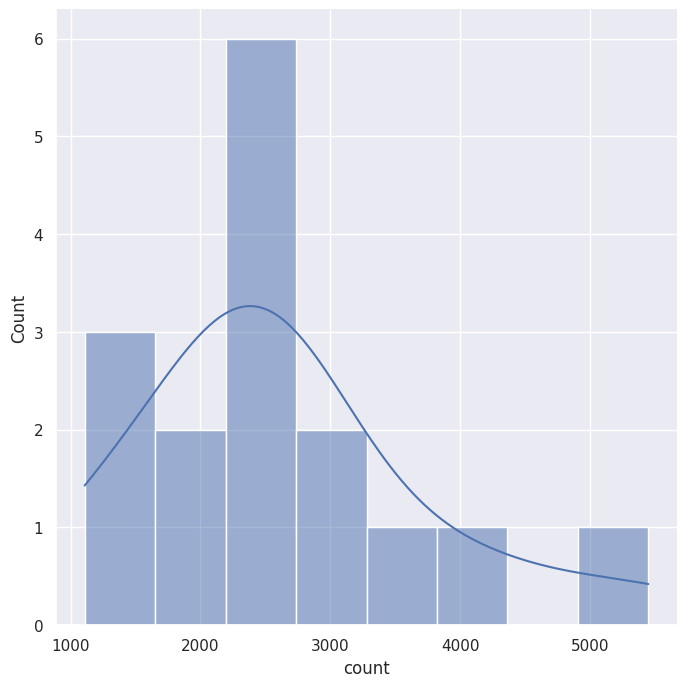

In [38]:
sns.histplot(vc,kde=True)

In [39]:
df[df['agreement']>0.6]

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,cleaned_text
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,8,0.777778,gender perspective paulgaard point labour mark...
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,8,0.777778,average figure also mask large differences acr...
8,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000,israel oceanographic limnological research sta...
9,10.18356/805b1ae4-en,001180f5dd9a821e651ed51e30d0cf8c,Previous chapters have discussed ways to make ...,2,0,3,1.000000,previous chapters discuss ways make food syste...
11,10.1017/S0008423907070424,00162fc8346ca9cd525d8f87ac2b5352,The “War on Terror” and the Framework of Inter...,16,0,7,1.000000,“ war terror ” framework international law hel...
...,...,...,...,...,...,...,...,...
42054,10.18356/d72eb315-en,fff1f2f84b7fdd3656431572ed087067,"As a fact-based management approach, its succe...",14,8,0,1.000000,factbased management approach successful imple...
42055,10.1787/5jm0xdx0b06g-en,fff2c0d02ac13430cdc5fb0efdfd5bdc,"Nevertheless, the survey Encuesta de Caracteri...",5,8,1,0.777778,nevertheless survey encuesta de caracterizacio...
42059,10.1787/9789264214033-7-en,fff9b6b75bde5397ba26ed1b163ad306,"It also features individual accountability, wh...",4,0,9,1.000000,also feature individual accountability mean te...
42062,10.1787/9789264186378-8-en,fffe58dae29de6b843aff09b6e2f77f0,Groundwater quality can also be affected by co...,6,0,3,1.000000,groundwater quality also affect contamination ...


/home/franck/.pyenv/versions/3.10.6/envs/SDGs-Classifier/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


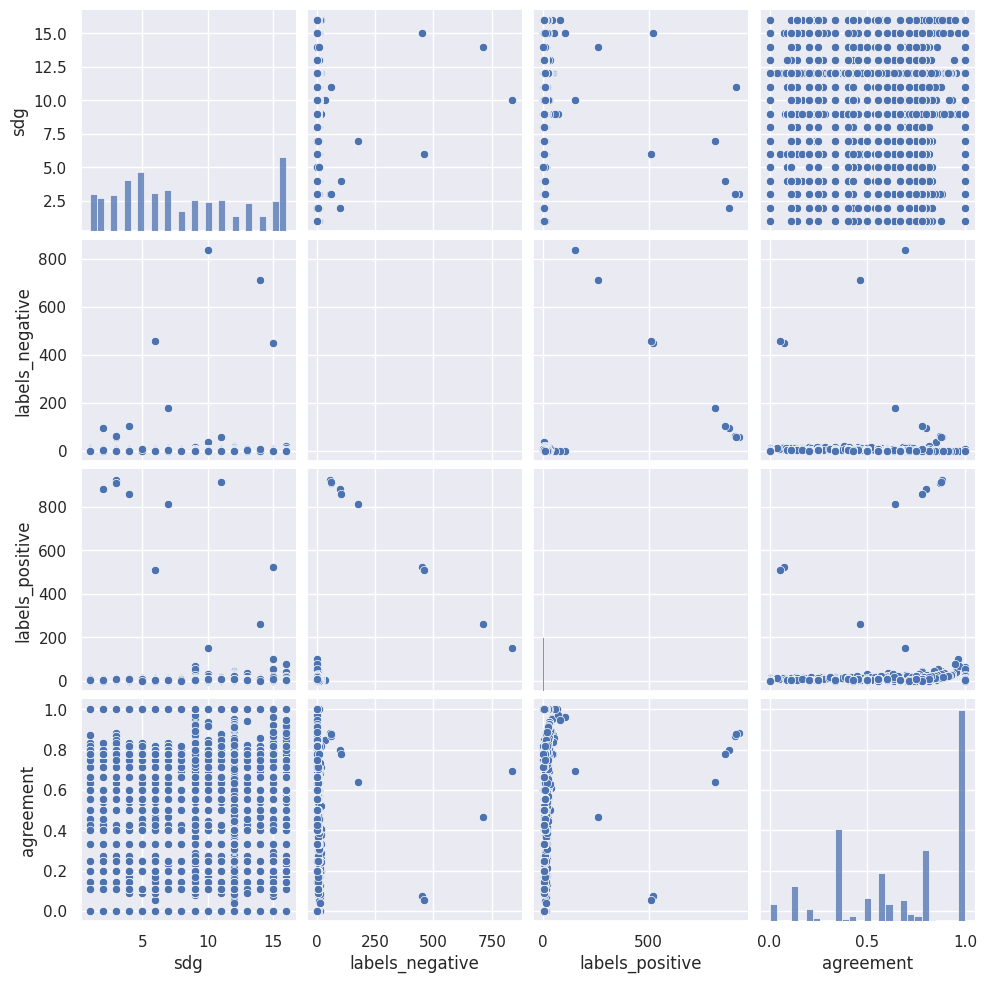

In [40]:
sns.pairplot(df)